In [352]:
import numpy as np
import scipy as sc
import sklearn
import pandas as pd
from scipy.special import logit, expit
from scipy.linalg import inv, det
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

A_train = np.loadtxt("classification_data_HWK1/classificationA.train", delimiter='\t')
A_test = np.loadtxt("classification_data_HWK1/classificationA.test", delimiter='\t')

B_train = np.loadtxt("classification_data_HWK1/classificationB.train", delimiter='\t')
B_test = np.loadtxt("classification_data_HWK1/classificationB.test", delimiter='\t')

C_train = np.loadtxt("classification_data_HWK1/classificationC.train", delimiter='\t')
C_test = np.loadtxt("classification_data_HWK1/classificationC.test", delimiter='\t')

# Logistic Regression
## Train A

In [353]:
X = np.c_[ A_train[:,[0,1]], np.ones(A_train.shape[0])]
y = A_train[:,2]
X_T = np.transpose(X)
w = np.array([[0,0,0]])

max_iter=1000#Max of iterations
eps = pow(10,-6)#Precision
n_iter=0
while (n_iter < max_iter):
    grad = X_T@np.transpose(y-expit(w@X_T))
    hess = -X_T@(X*np.transpose(expit(-w@X_T)*expit(w@X_T)))
    w = w -np.transpose(inv(hess)@grad)
    n_iter+=1
    preci = np.linalg.norm(grad, ord=2)
    if (preci < eps):
        break

w = w.flatten()
w_1, w_2, b = w[0], w[1], w[2]
print("Number of iterations:", n_iter)
print("w :",w_1,w_2)
print("b :",b)

Number of iterations: 23
w : -401.7181022379816 -695.7728262698384
b : -66.88584915313994


Score:  100.0 %


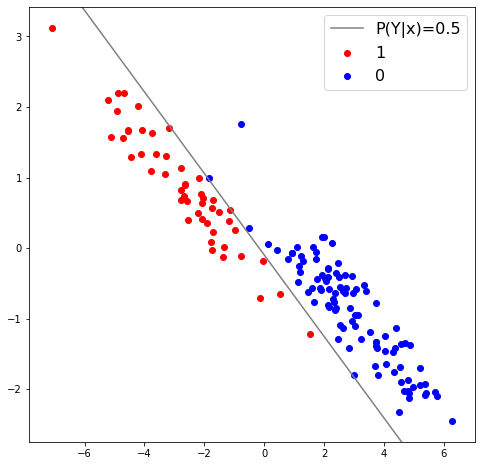

In [354]:
X_1 =X[y==1]
X_0 =X[y==0]

pred = (np.transpose(X@np.transpose(w)) >= 0)#>0 mean we should predict 1
score = np.linalg.norm(y-pred, ord=1)/np.shape(y)[0]
print("Score: ", 100*(1-score), "%")

x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
x1 = np.linspace(x_min, x_max, 1000)
x2 = [(-b-w_1*x)/w_2 for x in x1]

plt.figure(figsize = (8, 8))
plt.plot(x1, x2, c='grey', label='P(Y|x)=0.5')
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', label='1')
plt.scatter(X_0[:, 0], X_0[:, 1], c='b', label='0')
plt.ylim(np.min(X[:,1])-0.3,np.max(X[:,1])+0.3)
plt.legend(loc="upper right", fontsize=16)
plt.show()

## Test A

Score:  96.6 %


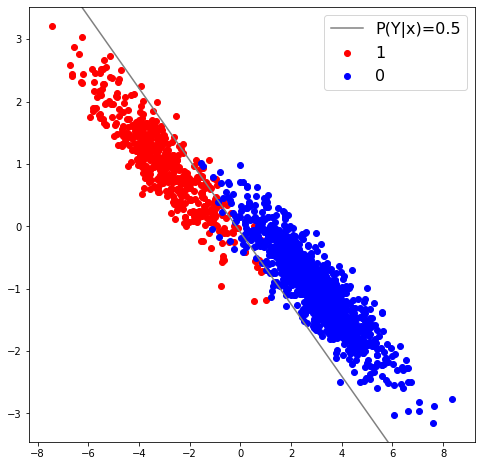

In [355]:
X, y = np.c_[ A_test[:,[0,1]], np.ones(A_test.shape[0])], A_test[:,2]
X_1 = X[y==1]
X_0 = X[y==0]

z = np.transpose(X@np.transpose(w))
pred = (z >= 0)

score = np.linalg.norm(y-pred, ord=1)/np.shape(y)[0]
print("Score: ", 100*(1-score), "%")


x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
x1 = np.linspace(x_min, x_max, 1000)
x2 = [(-b-w_1*x)/w_2 for x in x1]

plt.figure(figsize = (8, 8))
plt.plot(x1, x2, c='grey', label='P(Y|x)=0.5')
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', label='1')
plt.scatter(X_0[:, 0], X_0[:, 1], c='b', label='0')
plt.ylim(np.min(X[:,1])-0.3,np.max(X[:,1])+0.3)
plt.legend(loc="upper right", fontsize=16)
plt.show()

## Train B

In [356]:
X = np.c_[ B_train[:,[0,1]], np.ones(B_train.shape[0])]
y = B_train[:,2]
X_T = np.transpose(X)
w = np.array([[0,0,0]])

max_iter=1000#Max of iterations
eps = pow(10,-6)#Precision
n_iter=0
while (n_iter < max_iter):
    grad = X_T@np.transpose(y-expit(w@X_T))
    hess = -X_T@(X*np.transpose(expit(-w@X_T)*expit(w@X_T)))
    w = w -np.transpose(inv(hess)@grad)
    n_iter+=1
    preci = np.linalg.norm(grad, ord=2)
    if (preci < eps):
        break

w = w.flatten()
w_1, w_2, b = w[0], w[1], w[2]
print("Number of iterations:", n_iter)
print("w :",w_1,w_2)
print("b :",b)

Number of iterations: 10
w : -1.705185859561758 1.0237853771334482
b : 1.3495915731453352


Score:  98.0 %


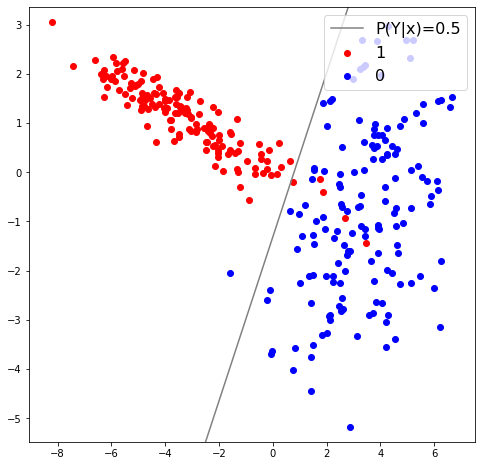

In [357]:
X_1 =X[y==1]
X_0 =X[y==0]

pred = (np.transpose(X@np.transpose(w)) >= 0)#>0 mean we should predict 1
score = np.linalg.norm(y-pred, ord=1)/np.shape(y)[0]
print("Score: ", 100*(1-score), "%")

x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
x1 = np.linspace(x_min, x_max, 1000)
x2 = [(-b-w_1*x)/w_2 for x in x1]

plt.figure(figsize = (8, 8))
plt.plot(x1, x2, c='grey', label='P(Y|x)=0.5')
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', label='1')
plt.scatter(X_0[:, 0], X_0[:, 1], c='b', label='0')
plt.ylim(np.min(X[:,1])-0.3,np.max(X[:,1])+0.3)
plt.legend(loc="upper right", fontsize=16)
plt.show()

## Test B

Score:  95.7 %


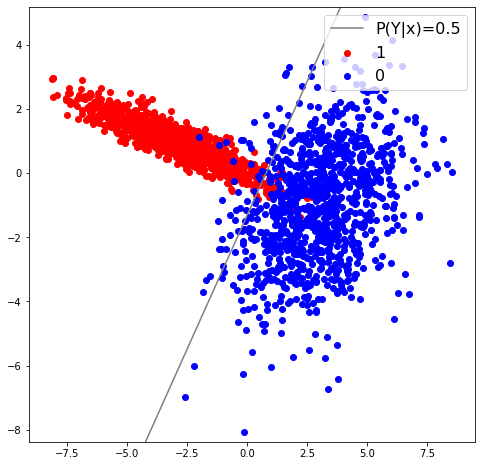

In [358]:
X, y = np.c_[ B_test[:,[0,1]], np.ones(B_test.shape[0])], B_test[:,2]
X_1 = X[y==1]
X_0 = X[y==0]

z = np.transpose(X@np.transpose(w))
pred = (z >= 0)

score = np.linalg.norm(y-pred, ord=1)/np.shape(y)[0]
print("Score: ", 100*(1-score), "%")


x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
x1 = np.linspace(x_min, x_max, 1000)
x2 = [(-b-w_1*x)/w_2 for x in x1]

plt.figure(figsize = (8, 8))
plt.plot(x1, x2, c='grey', label='P(Y|x)=0.5')
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', label='1')
plt.scatter(X_0[:, 0], X_0[:, 1], c='b', label='0')
plt.ylim(np.min(X[:,1])-0.3,np.max(X[:,1])+0.3)
plt.legend(loc="upper right", fontsize=16)
plt.show()

## Train C

In [359]:
X = np.c_[ C_train[:,[0,1]], np.ones(C_train.shape[0])]
y = C_train[:,2]
X_T = np.transpose(X)
w = np.array([[0,0,0]])

max_iter=1000#Max of iterations
eps = pow(10,-6)#Precision
n_iter=0
while (n_iter < max_iter):
    grad = X_T@np.transpose(y-expit(w@X_T))
    hess = -X_T@(X*np.transpose(expit(-w@X_T)*expit(w@X_T)))
    w = w -np.transpose(inv(hess)@grad)
    n_iter+=1
    preci = np.linalg.norm(grad, ord=2)
    if (preci < eps):
        break

w = w.flatten()
w_1, w_2, b = w[0], w[1], w[2]
print("Number of iterations:", n_iter)
print("w :",w_1,w_2)
print("b :",b)

Number of iterations: 10
w : -2.203232396927778 0.7092656213181059
b : 0.9591888541050092


Score:  96.0 %


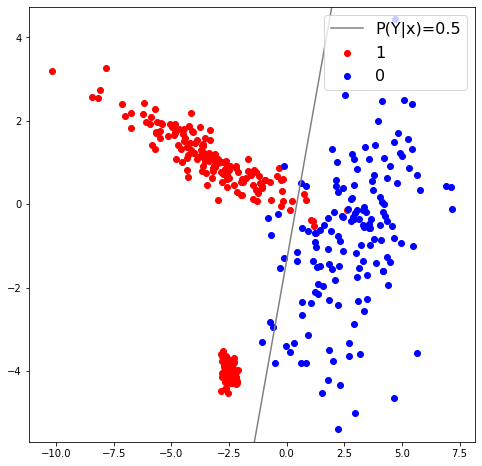

In [360]:
X_1 =X[y==1]
X_0 =X[y==0]

pred = (np.transpose(X@np.transpose(w)) >= 0)#>0 mean we should predict 1
score = np.linalg.norm(y-pred, ord=1)/np.shape(y)[0]
print("Score: ", 100*(1-score), "%")

x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
x1 = np.linspace(x_min, x_max, 1000)
x2 = [(-b-w_1*x)/w_2 for x in x1]

plt.figure(figsize = (8, 8))
plt.plot(x1, x2, c='grey', label='P(Y|x)=0.5')
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', label='1')
plt.scatter(X_0[:, 0], X_0[:, 1], c='b', label='0')
plt.ylim(np.min(X[:,1])-0.3,np.max(X[:,1])+0.3)
plt.legend(loc="upper right", fontsize=16)
plt.show()

## Test C

Score:  97.73333333333333 %


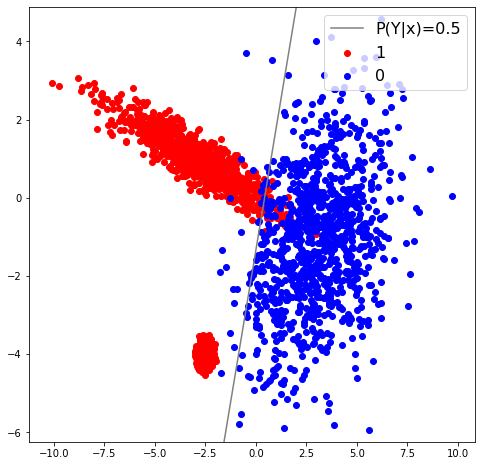

In [361]:
X, y = np.c_[ C_test[:,[0,1]], np.ones(C_test.shape[0])], C_test[:,2]
X_1 = X[y==1]
X_0 = X[y==0]

z = np.transpose(X@np.transpose(w))
pred = (z >= 0)

score = np.linalg.norm(y-pred, ord=1)/np.shape(y)[0]
print("Score: ", 100*(1-score), "%")


x_min = np.min(X[:,0])
x_max = np.max(X[:,0])
x1 = np.linspace(x_min, x_max, 1000)
x2 = [(-b-w_1*x)/w_2 for x in x1]

plt.figure(figsize = (8, 8))
plt.plot(x1, x2, c='grey', label='P(Y|x)=0.5')
plt.scatter(X_1[:, 0], X_1[:, 1], c='r', label='1')
plt.scatter(X_0[:, 0], X_0[:, 1], c='b', label='0')
plt.ylim(np.min(X[:,1])-0.3,np.max(X[:,1])+0.3)
plt.legend(loc="upper right", fontsize=16)
plt.show()